In [1]:
import sys #you need this to add path to utils folder
sys.path.append('../utils') #now you can import from utils folder
# sys.path.append("../..")
from configs import config_general
from dataloaders import dataloader_emg_joints
from datasets import EmgJointPairDataset
from data_utils import fft_filter_signal

c:\Users\saile\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [2]:
config = config_general( #these are just example values we will change them according to model
    batch_size = 32 ,
    epochs = 10,
    lr = .005,
    scheduler =None ,
    num_channels_emg = 6,
    num_channels_joints = 3,
    num_sessions = 3,
    seed = 42,
    data_folder_name = "../../datacollection/data",
    dataset_root = "../../datasets",
    dataset_name = "example_dataset",
    train_test_split = .8,
    window_length = 1000,
    emg_transforms = [],
    joint_transforms = [fft_filter_signal],
    )

In [3]:
remake_dataset = False
if(remake_dataset):
    dataloader = dataloader_emg_joints(config)
    dataloader.load_data()
    print(dataloader.data.shape)
    dataloader.save_windowed_data()


In [4]:
dataset_train = EmgJointPairDataset(config, "train")
dataset_test = EmgJointPairDataset(config, "test")
len(dataset_train), len(dataset_test)

(480, 120)

In [10]:
emg_data_tensor,joint_data_tensor=dataset_train.__getitem__(1)

print(emg_data_tensor.shape, joint_data_tensor.shape)

torch.Size([1, 1000, 6]) torch.Size([1, 1000, 3])


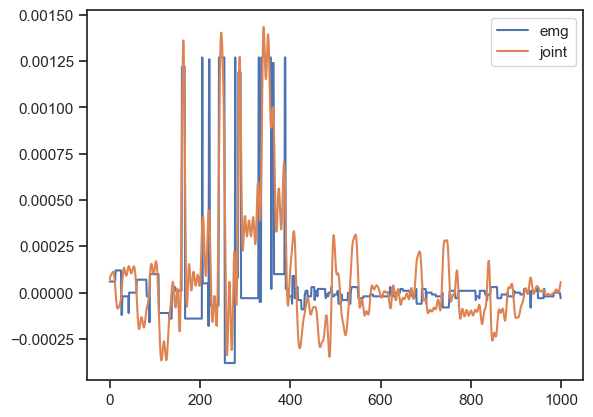

In [17]:
#convert to numpy
emg_data = emg_data_tensor.numpy().squeeze(0)
joint_data = joint_data_tensor.numpy().squeeze(0)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")
plt.plot(emg_data[:,1], label="emg")
plt.plot(joint_data[:,1], label="joint")
plt.legend()
plt.show()